In [86]:
import numpy as np
import pandas as pd
import os
import warnings
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from ClassificadorAlfa import ClassificadorAlfa
warnings.filterwarnings('ignore')

In [87]:
df = pd.read_csv(os.path.join('data', 'healthcare-dataset-stroke-data.csv'))

## Hipótese 1

Para a hipótese 1, vamos testar todos os dados contidos no DataFrame, sem alterações, porém apenas os dados que podem ser tratados como Booleanos. Vamos utilizar as variáveis categóricas para realizar o teste. A hipótese nula, no caso, seria montar um classificador que irá sempre prever os dados como sendo o mais frequente $(x)$, ou seja, será a acurácia medida ao dividir tal valor pelo total dos dados contidos no DataFrame $(N)$:

$$
Acurácia-nula = \frac{x}{N}
$$

Portanto, vamos calcular, ao final, a acurácia da hipótese nula e verificar como a nossa hipótese, utilizando todas as variáveis categóricas, se comporta com relação a ela.

In [88]:
# Separando target e features
try:
    df_ = df.drop(['id', 'bmi', 'age', 'avg_glucose_level'], axis=1)
except:
    pass

X = df_.drop('stroke', axis=1)
y = df_['stroke']

In [89]:
# Obtendo variáveis categoricas
object_features = [feature for feature in X.columns if X[feature].dtype == 'O']
int_features = [feature for feature in X.columns if X[feature].dtype == 'int64']
categorical_features = object_features + int_features

In [90]:
# Obtendo variáveis dummy
X = X[categorical_features]

X = pd.get_dummies(X)
X.hypertension = X.hypertension.astype('bool')
X.heart_disease = X.heart_disease.astype('bool')

X_names = X.columns

y = y.replace(0,-1)

X = X.to_numpy()
y = y.to_numpy()

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)
X_train = X_train.astype('float64')
y_train = y_train.astype('float64')
X_test = X_test.astype('float64')
y_test = y_test.astype('float64')

In [92]:
# Inicializando os parâmetros do modelo
a = np.random.randn(X_train.shape[1], 1)
b = 1.0

X_train = X_train.T
y_train = y_train.T

parametros = [a, b, X_train, y_train]
learning_rate = 0.0001
num_iteracoes = 50000

In [93]:
classificador = ClassificadorAlfa(learning_rate, num_iteracoes, parametros)

In [94]:
# Treinando o modelo
a, b = classificador.treinar()
a, b

(array([[ 0.36722476],
        [ 0.17093375],
        [-0.49843785],
        [-0.53760738],
        [-1.3823135 ],
        [ 0.11714646],
        [ 0.09708144],
        [-0.86126797],
        [-2.20388518],
        [-0.5123357 ],
        [-0.29377365],
        [-0.28437859],
        [-0.52797108],
        [-0.50145555],
        [-0.12605875],
        [ 0.26999978],
        [ 0.05006282],
        [ 0.31133328]]),
 0.418112303040903)

In [95]:
# Fazendo previsões
ypred = a.T @ X_test.T + b
ypred

array([[-0.34499285, -0.77497386, -0.95342305, ..., -1.10302908,
        -0.92690752, -0.73348609]])

In [96]:
acuracia = ClassificadorAlfa.acuracia(y_test, ypred)
print(f'A acurácia do modelo foi de {acuracia*100:.2f}%')

A acurácia do modelo foi de 95.69%


In [97]:
# Selecionando as features mais importantes
features = X_names
importances = pd.DataFrame(data=a, index=features, columns=['importance']).sort_values(by='importance', ascending=False)
importances

importance
hypertension                      0.367225
smoking_status_smokes             0.311333
smoking_status_formerly smoked    0.270000
heart_disease                     0.170934
ever_married_No                   0.117146
ever_married_Yes                  0.097081
smoking_status_never smoked       0.050063
smoking_status_Unknown           -0.126059
work_type_children               -0.284379
work_type_Self-employed          -0.293774
gender_Female                    -0.498438
Residence_type_Urban             -0.501456
work_type_Private                -0.512336
Residence_type_Rural             -0.527971
gender_Male                      -0.537607
work_type_Govt_job               -0.861268
gender_Other                     -1.382314
work_type_Never_worked           -2.203885

In [98]:
# Obtendo a acurácia da hipótese nula
acuracia_nula = y[y == -1].shape[0] / y.shape[0]

print(f'A acurácia da hipótese nula foi de {acuracia_nula*100:.2f}%')
print(f'A acurácia do modelo foi de {acuracia*100:.2f}%')

A acurácia da hipótese nula foi de 95.13%
A acurácia do modelo foi de 95.69%


### Utilizando um classificador de árvore de decisão

Em seguida, vamos comparar o nosso modelo com um classificador de árvore de decisão, comparando, novamente, as acurácias obtidas.

In [99]:
from sklearn.tree import DecisionTreeClassifier

In [100]:
classificador = DecisionTreeClassifier(criterion='entropy')

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)
X_train = X_train.astype('float64')
y_train = y_train.astype('float64')
X_test = X_test.astype('float64')
y_test = y_test.astype('float64')

In [102]:
classificador.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [103]:
classificador.predict(X_test)

array([-1., -1., -1., ..., -1., -1., -1.])

In [104]:
acuracia = classificador.score(X_test, y_test)

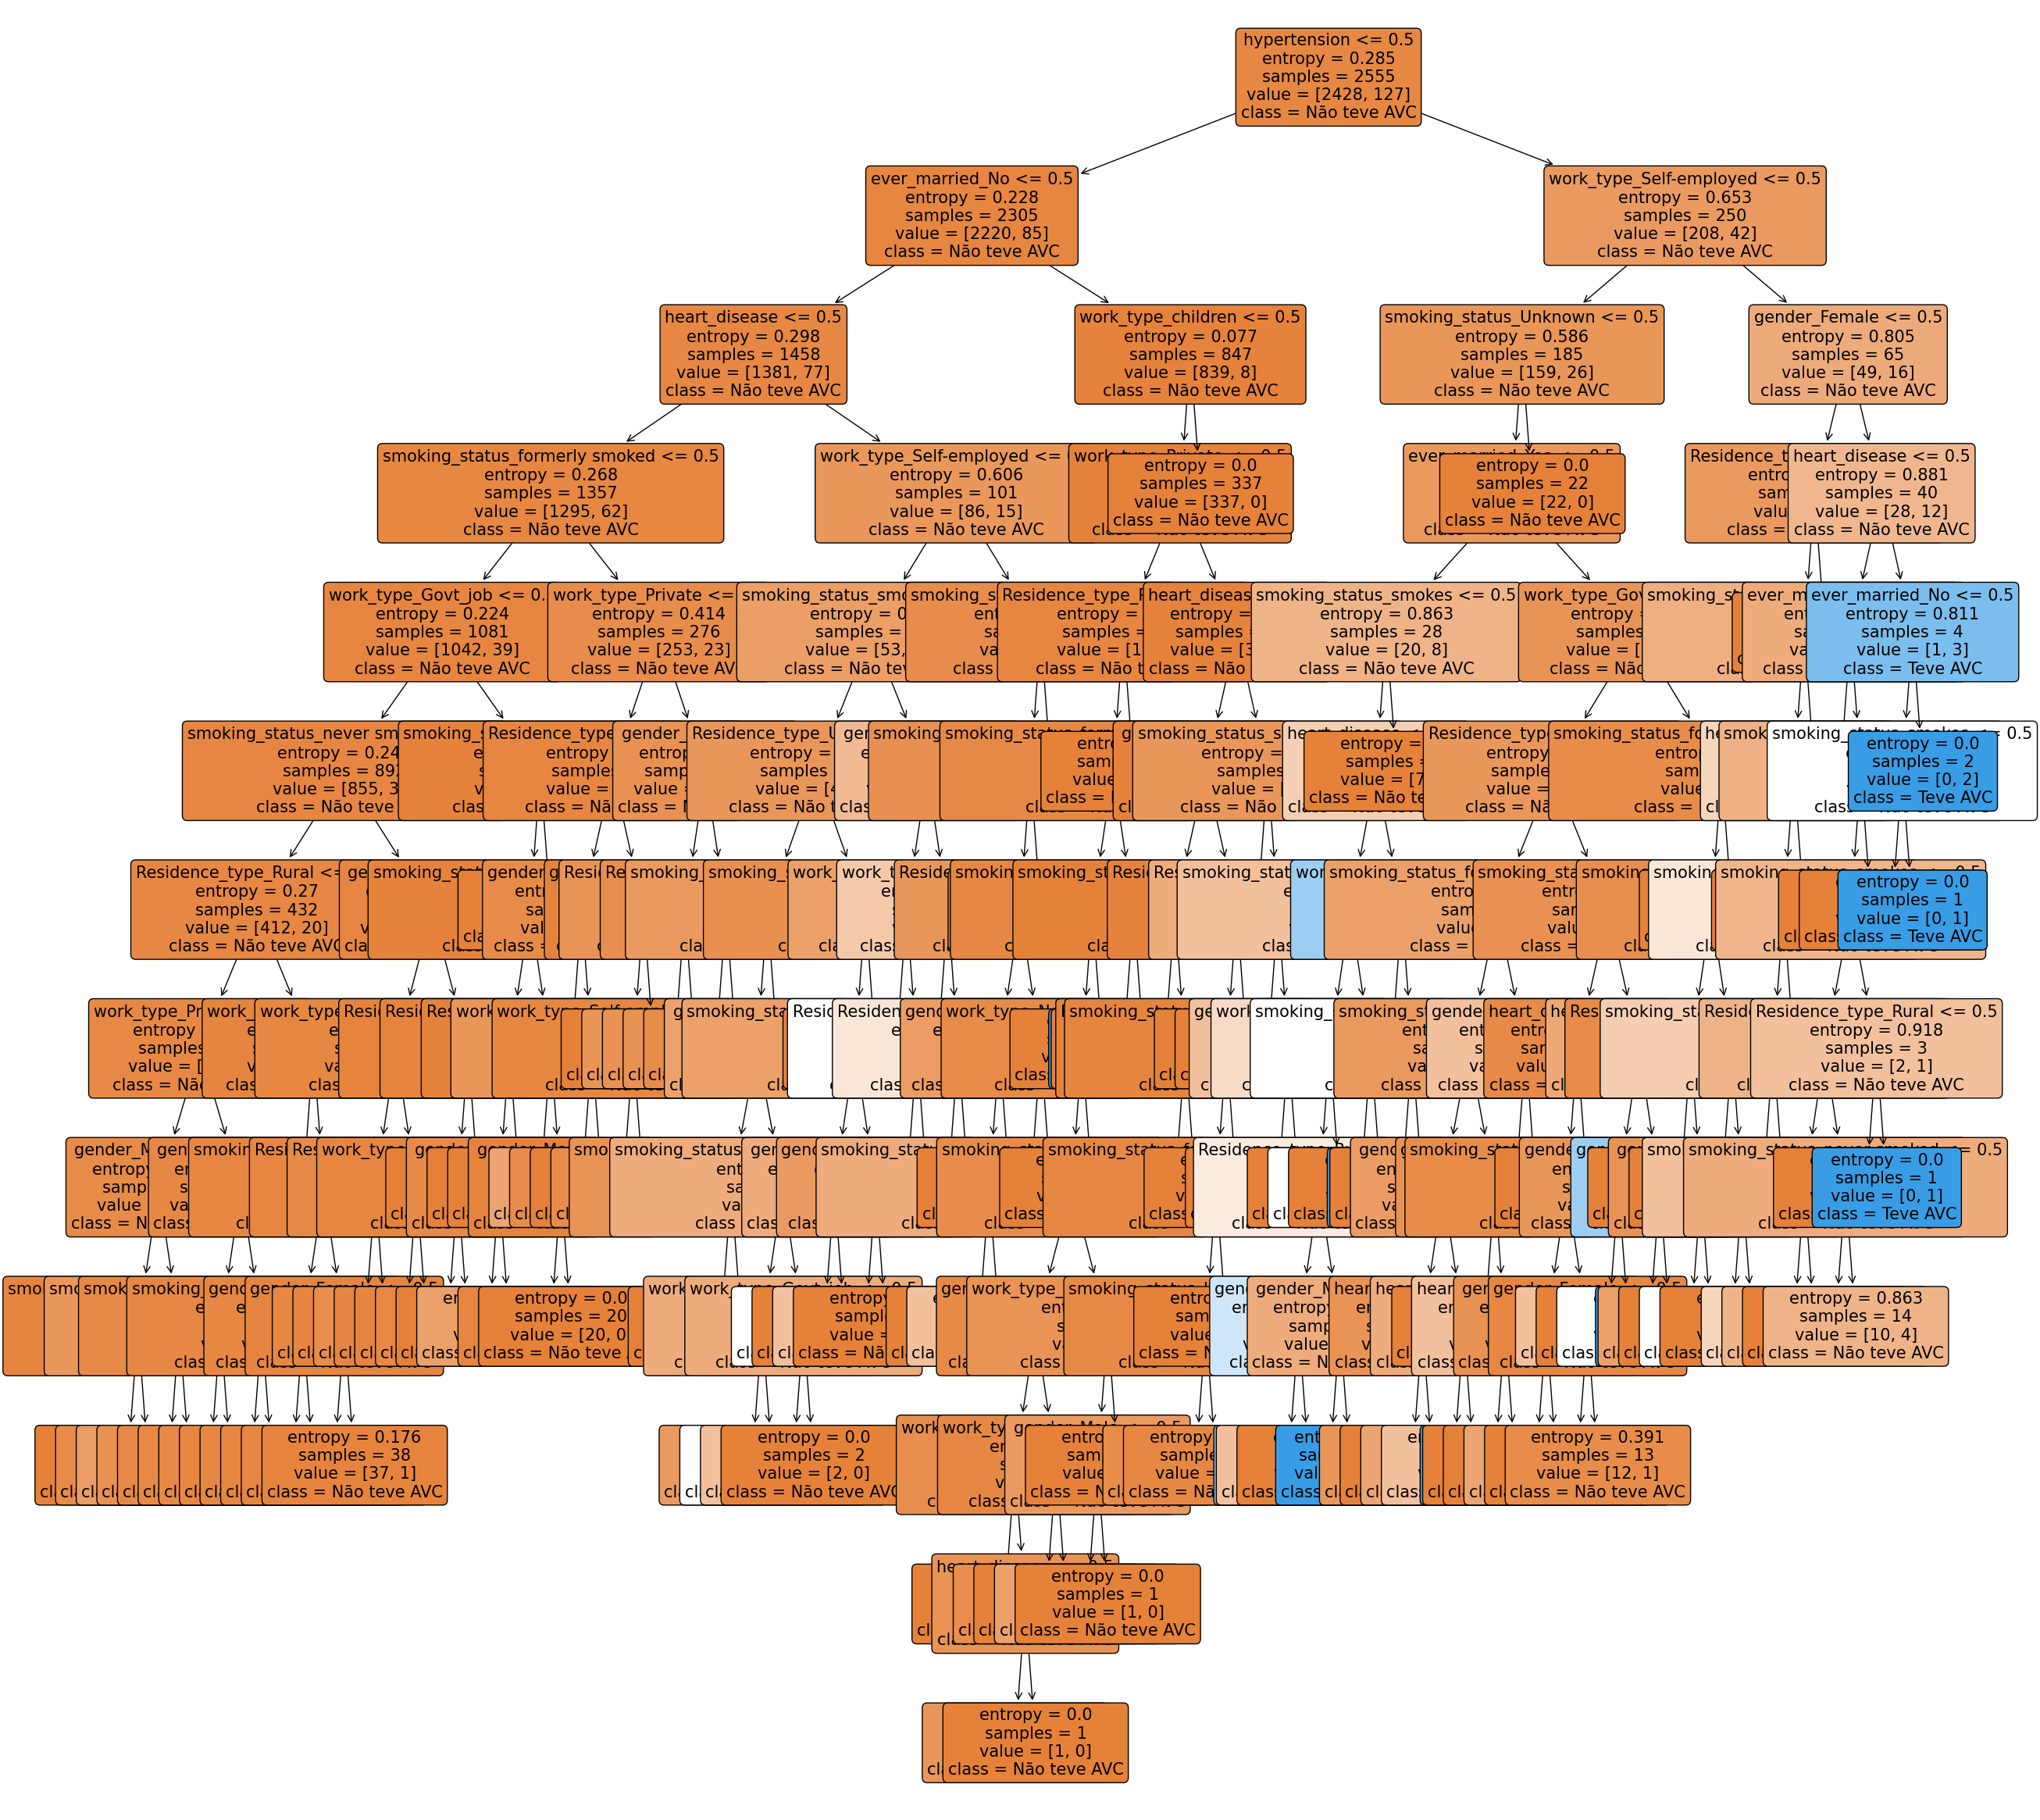

In [105]:
# Plotando a árvore de decisão
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 30))
plot_tree(classificador, filled=True, rounded=True, class_names=['Não teve AVC', 'Teve AVC'], feature_names=X_names, fontsize=15, node_ids=False)
plt.show()

In [106]:
# Obtendo as features mais importantes
importances = pd.DataFrame(data=classificador.feature_importances_, index=X_names, columns=['importance']).sort_values(by='importance', ascending=False)
importances

importance
hypertension                      0.159004
ever_married_No                   0.103432
heart_disease                     0.094631
Residence_type_Urban              0.075843
gender_Male                       0.075481
gender_Female                     0.073758
smoking_status_smokes             0.061355
smoking_status_never smoked       0.055440
smoking_status_formerly smoked    0.053042
work_type_Private                 0.049028
work_type_Govt_job                0.047590
Residence_type_Rural              0.042141
smoking_status_Unknown            0.042013
work_type_Self-employed           0.026914
work_type_children                0.023279
ever_married_Yes                  0.015269
work_type_Never_worked            0.001779
gender_Other                      0.000000

In [107]:
print(f'A acurácia da hipótese nula foi de {acuracia_nula*100:.2f}%')
print(f'A acurácia do modelo foi de {acuracia*100:.2f}%')

A acurácia da hipótese nula foi de 95.13%
A acurácia do modelo foi de 94.17%


Como podemos observar com as acurácias obtidas, todas ficaram rondando os 95% nos testes. Como a grande maioria dos dados na base são de pessoas que não tiveram AVCs, o classificador da hipótese nula sempre terá uma acurácia muito alta, visto que ele sempre irá prever que a pessoa não teve AVC. Assim, o nosso modelo não funciona de maneira significativamente melhor que a hipótese nula, assim como o modelo de árvore de decisão. Na nossa próxima hipótese, tentaremos realizar o classificador, trabalhando com uma base de dados reduzida, para tentarmos verificar uma mudança mais significativa na acurácia.

## Hipótese 2

Para nossa próxima hipótese, manteremos o cálculo da acurácia da hipótese nula, porém obteremos um subset, dentro de nossa base de dados, com valores balanceados de pessoas com e sem AVCs, ou seja, teremos uma base de dados com 50% de pessoas que tiveram AVCs e 50% de pessoas que não tiveram AVCs. Assim, poderemos verificar se o nosso modelo consegue prever melhor os casos de AVCs, visto que teremos uma base de dados mais balanceada. Nesse caso, a acurácia de nosso classificador nulo será de 50%.

In [108]:
# Preparando os dados
try:
    df_ = df.drop(['id', 'bmi', 'age', 'avg_glucose_level'], axis=1)
except:
    pass

In [109]:
# Separando a base de dados balanceada
df_stroke = df_[df_.stroke == 1]
df_no_stroke = df_[df_.stroke == 0]
# Obtendo um sample aleatório da base de dados sem AVCs
df_no_stroke = df_no_stroke.sample(n=df_stroke.shape[0], random_state=42)
# Concatenando os dados
df_ = pd.concat([df_stroke, df_no_stroke])

In [110]:
# Separando os dados
X = df_.drop('stroke', axis=1)
y = df_.stroke

In [111]:
# Obtendo variáveis categoricas
object_features = [feature for feature in X.columns if X[feature].dtype == 'O']
int_features = [feature for feature in X.columns if X[feature].dtype == 'int64']
categorical_features = object_features + int_features

In [112]:
# Obtendo variáveis dummy
X = X[categorical_features]

X = pd.get_dummies(X)
X.hypertension = X.hypertension.astype('bool')
X.heart_disease = X.heart_disease.astype('bool')

X_names = X.columns

y = y.replace(0,-1)

X = X.to_numpy()
y = y.to_numpy()

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)
X_train = X_train.astype('float64')
y_train = y_train.astype('float64')
X_test = X_test.astype('float64')
y_test = y_test.astype('float64')

In [114]:
# Inicializando os parâmetros do modelo
a = np.random.randn(X_train.shape[1], 1)
b = 1.0

X_train = X_train.T
y_train = y_train.T

parametros = [a, b, X_train, y_train]
learning_rate = 0.0001
num_iteracoes = 50000

In [115]:
classificador = ClassificadorAlfa(learning_rate, num_iteracoes, parametros)

In [116]:
# Treinando o modelo
a, b = classificador.treinar()
a, b

(array([[ 0.14402258],
        [ 0.29675702],
        [-1.05879606],
        [-1.0367468 ],
        [-1.00969507],
        [-0.73002982],
        [ 1.26406483],
        [-0.31308242],
        [ 1.34906295],
        [ 1.68862725],
        [ 0.69408666],
        [ 0.19605565],
        [ 0.24232104],
        [-0.43108176],
        [-0.48947579],
        [-0.42503064],
        [-0.21765431]]),
 0.6442254394736837)

In [117]:
# Fazendo previsões
ypred = a.T @ X_test.T + b
ypred

array([[ 0.5907428 ,  0.02175291,  0.31505182,  0.12337959,  0.1195101 ,
        -0.06690837, -0.08895763, -0.00851434,  0.4166785 , -0.91893976,
        -0.02451248,  0.38336646,  0.54793552, -0.00246322, -0.02064299,
         0.61567833,  0.24622101, -0.11388977, -0.14415702,  0.02175291,
        -0.06690837,  0.31892131,  0.50533978, -0.04269224,  0.02175291,
        -0.94315589,  0.03451198, -0.02451248,  0.52243155, -0.1095106 ,
         0.2511785 ,  0.04380216,  0.22912924,  0.14155935,  0.02175291,
         0.31505182,  0.01570179,  0.54736369, -0.04119595, -0.02451248,
        -0.06690837, -0.02451248,  0.24622101,  0.52738904, -0.02451248,
        -0.00246322,  0.44089463,  0.31892131,  0.02175291, -0.04724708,
         0.38336646, -0.08895763,  0.34893569,  0.07215672,  0.20929568,
         0.1195101 , -0.02451248, -0.8968905 , -0.12769036,  0.18286386,
         0.68849999, -0.0305636 ,  0.35526608, -0.95915403,  0.47507253,
        -0.12769036, -0.8968905 , -0.8968905 , -0.0

In [118]:
acuracia = ClassificadorAlfa.acuracia(y_test, ypred)
print(f'A acurácia do modelo foi de {acuracia*100:.2f}%')

A acurácia do modelo foi de 60.64%


In [119]:
# Selecionando as features mais importantes
features = X_names
importances = pd.DataFrame(data=a, index=features, columns=['importance']).sort_values(by='importance', ascending=False)
importances

importance
work_type_Self-employed           1.688627
work_type_Private                 1.349063
work_type_Govt_job                1.264065
work_type_children                0.694087
heart_disease                     0.296757
Residence_type_Urban              0.242321
Residence_type_Rural              0.196056
hypertension                      0.144023
smoking_status_smokes            -0.217654
work_type_Never_worked           -0.313082
smoking_status_never smoked      -0.425031
smoking_status_Unknown           -0.431082
smoking_status_formerly smoked   -0.489476
ever_married_Yes                 -0.730030
ever_married_No                  -1.009695
gender_Male                      -1.036747
gender_Female                    -1.058796

In [120]:
# Obtendo a acurácia da hipótese nula
acuracia_nula = y[y == -1].shape[0] / y.shape[0]

print(f'A acurácia da hipótese nula foi de {acuracia_nula*100:.2f}%')
print(f'A acurácia do modelo foi de {acuracia*100:.2f}%')

A acurácia da hipótese nula foi de 50.00%
A acurácia do modelo foi de 60.64%


### Utilizando um classificador de árvore de decisão

Em seguida, vamos comparar o nosso modelo com um classificador de árvore de decisão, comparando, novamente, as acurácias obtidas.

In [121]:
classificador = DecisionTreeClassifier(criterion='entropy')

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)
X_train = X_train.astype('float64')
y_train = y_train.astype('float64')
X_test = X_test.astype('float64')
y_test = y_test.astype('float64')

In [123]:
classificador.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [124]:
classificador.predict(X_test)

array([ 1., -1., -1., -1.,  1., -1., -1., -1., -1., -1.,  1., -1., -1.,
       -1., -1., -1.,  1., -1.,  1., -1., -1., -1.,  1., -1., -1.,  1.,
       -1., -1., -1., -1., -1., -1., -1.,  1., -1.,  1.,  1., -1.,  1.,
       -1.,  1.,  1., -1., -1.,  1.,  1., -1., -1., -1., -1., -1., -1.,
       -1.,  1., -1.,  1., -1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1.,
        1., -1., -1.,  1.,  1.,  1., -1., -1., -1.,  1.,  1.,  1., -1.,
       -1.,  1.,  1., -1., -1.,  1., -1., -1.,  1.,  1.,  1., -1.,  1.,
        1.,  1., -1., -1., -1., -1., -1., -1., -1., -1.,  1., -1.,  1.,
       -1., -1., -1., -1., -1., -1.,  1., -1., -1., -1.,  1., -1.,  1.,
        1., -1., -1.,  1.,  1., -1., -1.,  1.,  1., -1.,  1., -1.,  1.,
        1., -1., -1., -1., -1., -1., -1.,  1., -1., -1., -1., -1.,  1.,
       -1.,  1.,  1., -1., -1., -1., -1., -1., -1.,  1., -1.,  1., -1.,
       -1.,  1., -1., -1., -1., -1., -1.,  1., -1.,  1.,  1., -1., -1.,
       -1.,  1., -1., -1.,  1.,  1., -1.,  1., -1.,  1.,  1.,  1

In [125]:
acuracia = classificador.score(X_test, y_test)

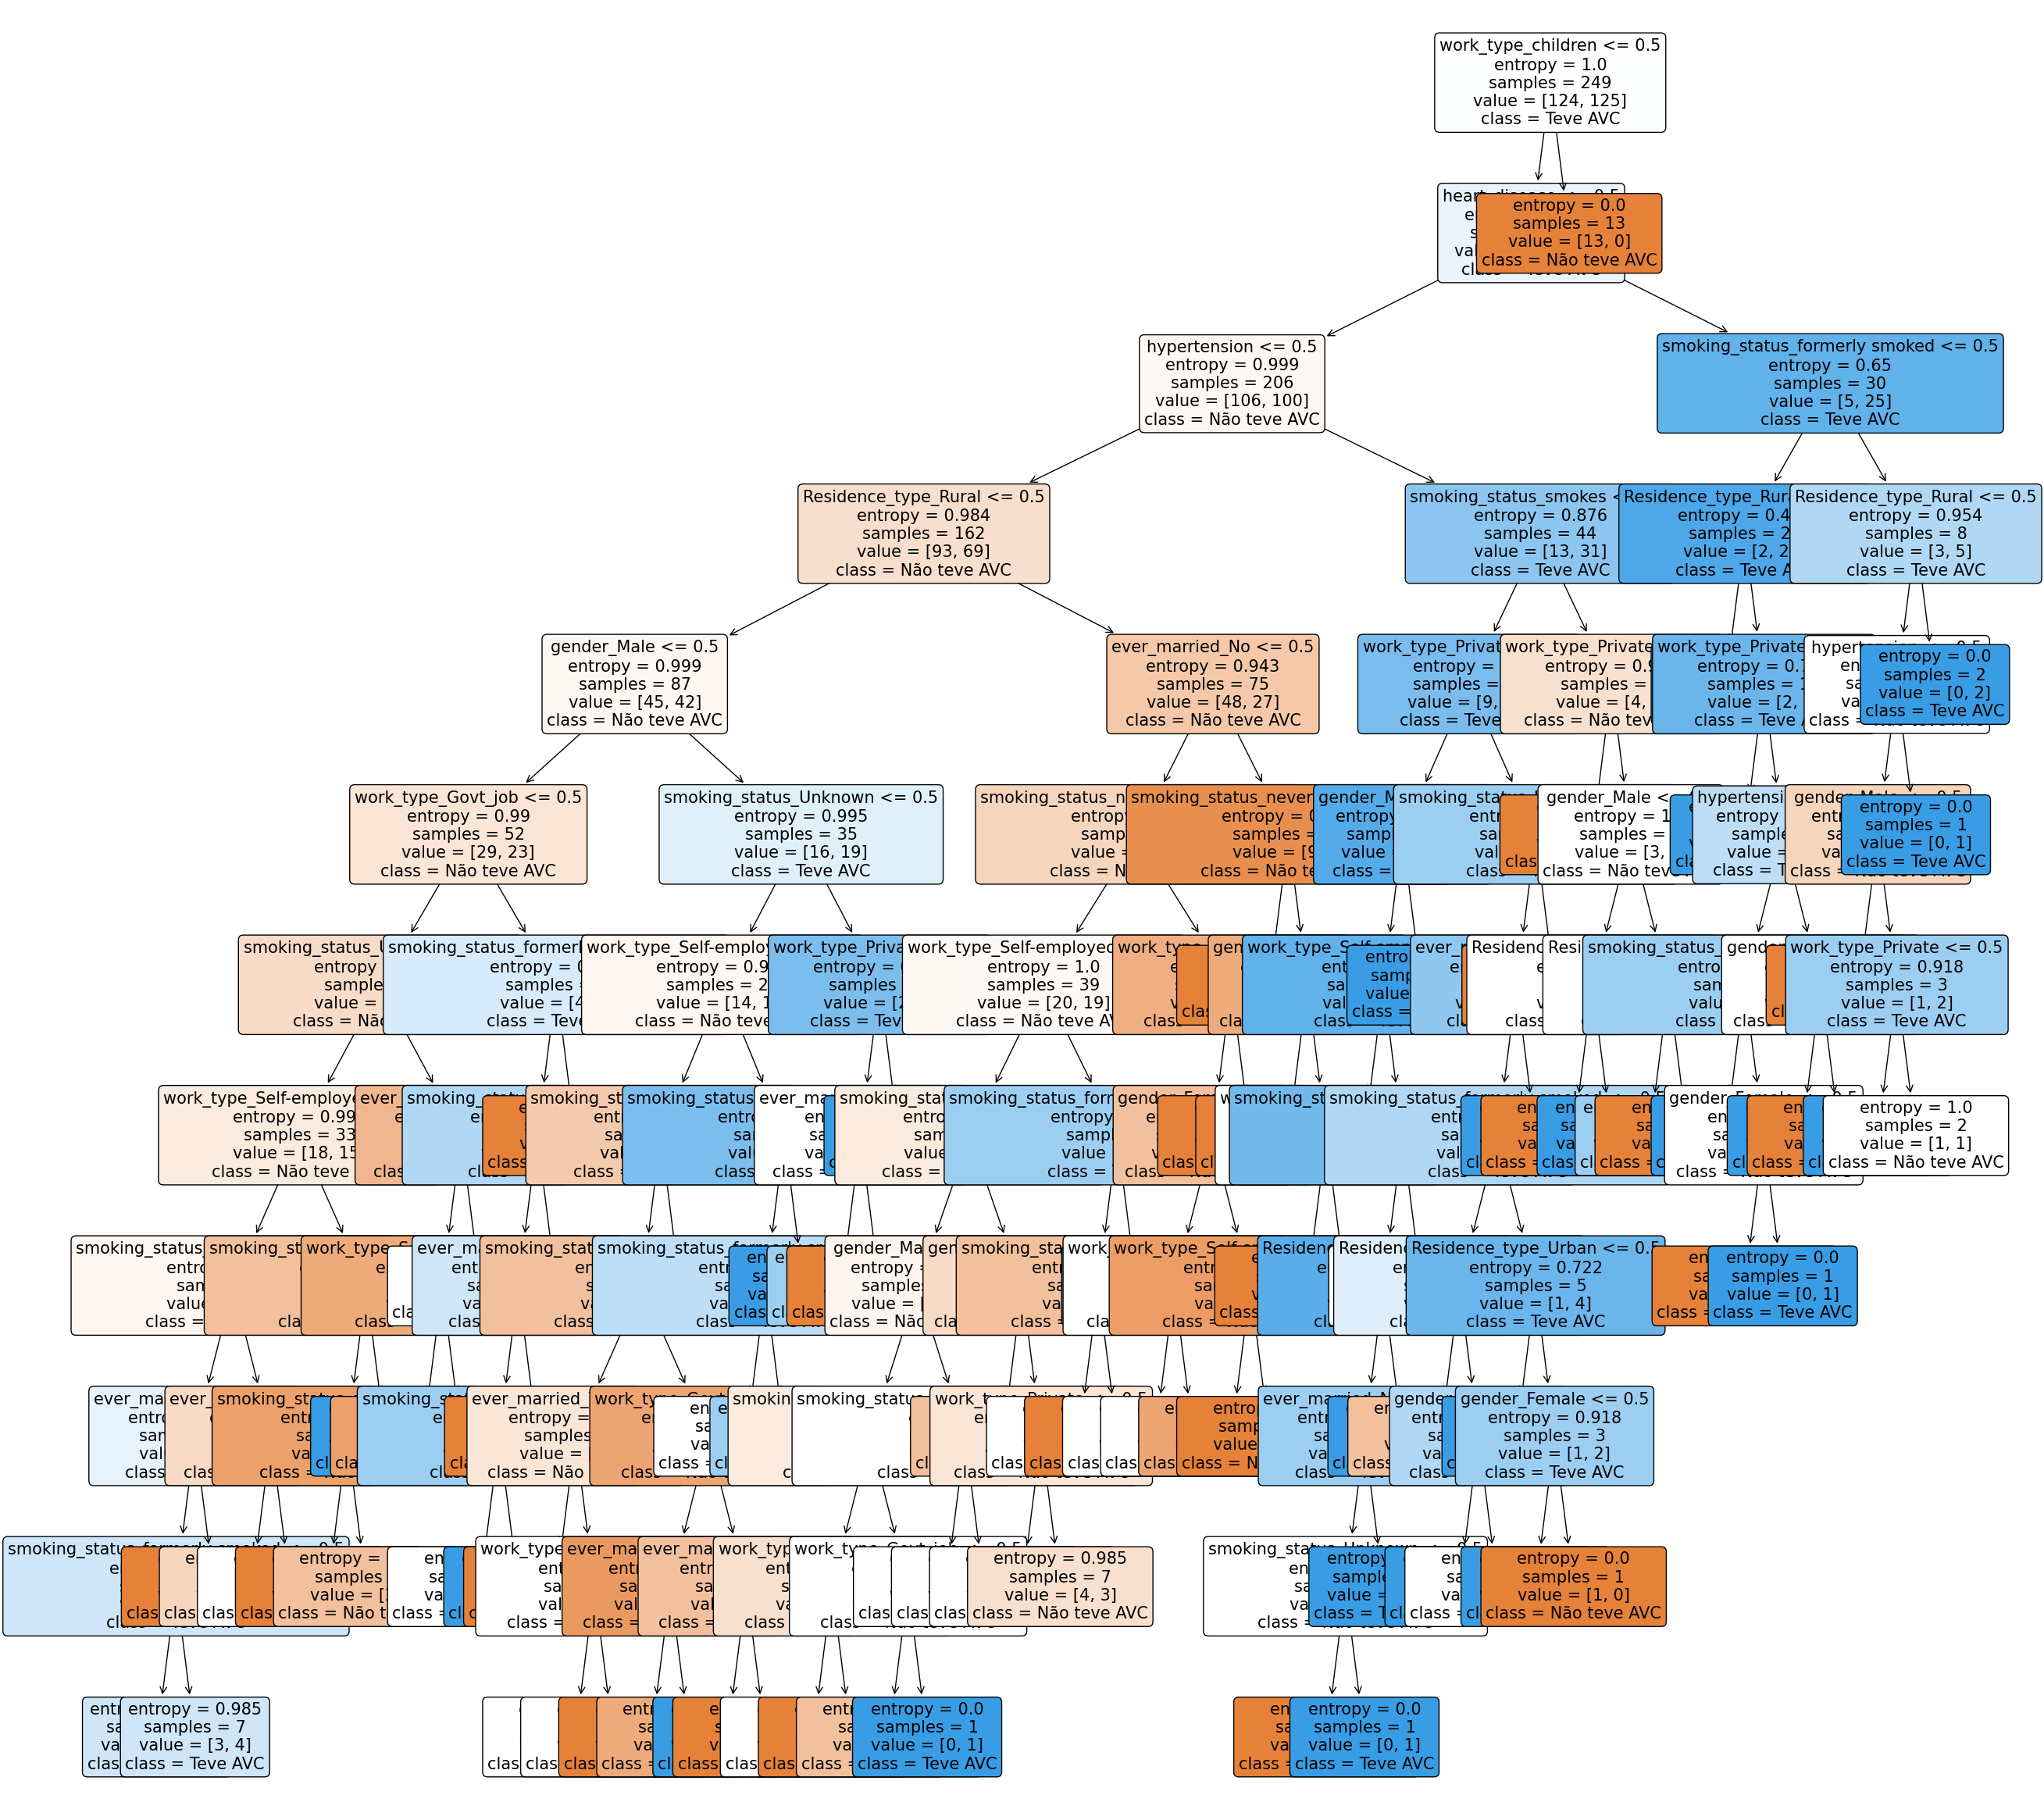

In [126]:
# Plotando a árvore de decisão
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 30))
plot_tree(classificador, filled=True, rounded=True, class_names=['Não teve AVC', 'Teve AVC'], feature_names=X_names,
          fontsize=15, node_ids=False)
plt.show()

In [127]:
# Obtendo as features mais importantes
importances = pd.DataFrame(data=classificador.feature_importances_, index=X_names, columns=['importance']).sort_values(
    by='importance', ascending=False)
importances

importance
work_type_children                0.108924
Residence_type_Rural              0.088605
ever_married_No                   0.081485
work_type_Private                 0.081414
heart_disease                     0.080319
gender_Female                     0.078859
hypertension                      0.073415
smoking_status_never smoked       0.072189
smoking_status_Unknown            0.063048
smoking_status_formerly smoked    0.062474
work_type_Govt_job                0.042740
gender_Male                       0.042259
smoking_status_smokes             0.041665
work_type_Self-employed           0.041072
ever_married_Yes                  0.034685
Residence_type_Urban              0.006848
work_type_Never_worked            0.000000

In [128]:
print(f'A acurácia da hipótese nula foi de {acuracia_nula * 100:.2f}%')
print(f'A acurácia do modelo foi de {acuracia * 100:.2f}%')

A acurácia da hipótese nula foi de 50.00%
A acurácia do modelo foi de 51.81%


Na nossa segunda hipótese, a diferença entre os modelos e a hipótese nula foi mais significativa. Obtivemos, como descrito anteriormente, uma base de dados balanceada, com 50% dos dados de pessoas que tiveram AVCs e 50% que não o tiveram. Assim, a acurácia nula da base de dados permaneceu em 50%. O modelo `ClassificadorAlfa` obteve uma acurácia de pouco mais de 59%, se tratando de uma diferença mais significativa. O classificador de árvore de decisão manteve uma acurácia de aproximadamente 53%, o que também é uma diferença significativa em relação à hipótese nula, mesmo que não tão significativa quanto a diferença obtida pelo `ClassificadorAlfa`. Em seguida, vamos analisar a nossa terceira hipótese.

## Hipótese 3

Em nossa terceira hipótese, vamos utilizar apenas os dados relacionados à saúde dos indivíduos, desconsiderando fatores como trabalho, casamento e moradia. A ideia é verificar se os dados relacionados à saúde presentes no dataset são suficientes para prever se uma pessoa teve ou não um AVC.

In [129]:
# Obtendo os dados
try:
    df_ = df.drop(['id', 'ever_married', 'work_type', 'Residence_type'], axis=1)
except:
    pass

In [130]:
# Criando clusters para as variáveis contínuas (clusters obtidos via ChatGPT)
df_['age'] = pd.cut(df.age, bins=[0, 13, 20, 40, 60, 100], labels=['Child', 'Teenager', 'Young-adult', 'Middle-aged', 'Elder'])

df_['bmi'] = pd.cut(df.bmi, bins=[0, 16.5, 25, 30, 40, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese', 'Morbidly-obese'])

df_['avg_glucose_level'] = pd.cut(df.avg_glucose_level, bins=[0, 90, 120, 140, 180, 280], labels=['Low', 'Normal', 'High-normal', 'Mildly-high', 'Severely-high'])

In [131]:
# Separando a base de dados balanceada
df_stroke = df_[df_.stroke == 1]
df_no_stroke = df_[df_.stroke == 0]
# Obtendo um sample aleatório da base de dados sem AVCs
df_no_stroke = df_no_stroke.sample(n=df_stroke.shape[0], random_state=42)
# Concatenando os dados
df_ = pd.concat([df_stroke, df_no_stroke])

In [132]:
# Separando os dados
X = df_.drop('stroke', axis=1)
y = df_.stroke

In [133]:
# Obtendo variáveis categoricas
object_features = [feature for feature in X.columns if X[feature].dtype == 'O']
int_features = [feature for feature in X.columns if X[feature].dtype == 'int64']
categorical_features = object_features + int_features

In [134]:
# Obtendo variáveis dummy
X = X[categorical_features]

X = pd.get_dummies(X)
X.hypertension = X.hypertension.astype('bool')
X.heart_disease = X.heart_disease.astype('bool')

X_names = X.columns

y = y.replace(0, -1)

X = X.to_numpy()
y = y.to_numpy()

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)
X_train = X_train.astype('float64')
y_train = y_train.astype('float64')
X_test = X_test.astype('float64')
y_test = y_test.astype('float64')

In [136]:
# Inicializando os parâmetros do modelo
a = np.random.randn(X_train.shape[1], 1)
b = 1.0

X_train = X_train.T
y_train = y_train.T

parametros = [a, b, X_train, y_train]
learning_rate = 0.0001
num_iteracoes = 50000

In [137]:
classificador = ClassificadorAlfa(learning_rate, num_iteracoes, parametros)

In [138]:
# Treinando o modelo
a, b = classificador.treinar()
a, b

(array([[ 0.52592784],
        [ 0.37491688],
        [-0.45899695],
        [-0.38357251],
        [-0.47584481],
        [-0.14284365],
        [-0.59313792],
        [-0.6903077 ]]),
 0.7664189386434812)

In [139]:
# Fazendo previsões
ypred = a.T @ X_test.T + b
ypred

array([[-0.09299837, -0.09299837, -0.28571592, -0.09299837,  0.16457834,
         0.24021192, -0.3828857 ,  0.61491966, -0.3828857 ,  0.31563636,
         0.06745562, -0.16842281, -0.28571592,  0.24000278,  0.31563636,
         0.24021192,  0.14304214, -0.16842281, -0.16842281, -0.3828857 ,
         0.24021192,  0.08920096, -0.28571592, -0.28571592,  0.69050618,
        -0.09299837,  0.24000278, -0.3828857 , -0.09299837, -0.28571592,
        -0.28571592,  0.16457834, -0.30746126, -0.28571592, -0.28571592,
         0.24021192, -0.09299837, -0.21029149, -0.28571592, -0.16842281,
        -0.28571592, -0.28571592, -0.28571592, -0.16842281, -0.30746126,
         0.16457834,  0.69055324, -0.09299837,  0.24021192,  0.24000278,
        -0.3828857 , -0.09299837, -0.16842281, -0.3828857 , -0.28571592,
        -0.28571592,  0.24000278,  0.08920096, -0.28571592,  0.69050618,
         0.69050618, -0.3828857 , -0.21029149, -0.28571592,  0.16457834,
        -0.30746126, -0.16842281,  0.28191851, -0.0

In [140]:
acuracia = ClassificadorAlfa.acuracia(y_test, ypred)
print(f'A acurácia do modelo foi de {acuracia * 100:.2f}%')

A acurácia do modelo foi de 61.45%


In [141]:
# Selecionando as features mais importantes
features = X_names
importances = pd.DataFrame(data=np.abs(a), index=features, columns=['importance']).sort_values(by='importance', ascending=False)
importances

importance
smoking_status_smokes             0.690308
smoking_status_never smoked       0.593138
hypertension                      0.525928
smoking_status_Unknown            0.475845
gender_Female                     0.458997
gender_Male                       0.383573
heart_disease                     0.374917
smoking_status_formerly smoked    0.142844

In [142]:
# Obtendo a acurácia da hipótese nula
acuracia_nula = y[y == -1].shape[0] / y.shape[0]

print(f'A acurácia da hipótese nula foi de {acuracia_nula * 100:.2f}%')
print(f'A acurácia do modelo foi de {acuracia * 100:.2f}%')

A acurácia da hipótese nula foi de 50.00%
A acurácia do modelo foi de 61.45%


### Utilizando o classificador de árvore de decisão

In [143]:
classificador = DecisionTreeClassifier(criterion='entropy')

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)
X_train = X_train.astype('float64')
y_train = y_train.astype('float64')
X_test = X_test.astype('float64')
y_test = y_test.astype('float64')

In [145]:
classificador.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [146]:
classificador.predict(X_test)

array([ 1., -1.,  1., -1., -1., -1.,  1.,  1.,  1.,  1., -1.,  1., -1.,
       -1., -1., -1.,  1.,  1., -1.,  1., -1., -1., -1.,  1.,  1., -1.,
       -1., -1.,  1.,  1.,  1., -1.,  1., -1., -1.,  1.,  1., -1.,  1.,
        1.,  1., -1.,  1., -1., -1., -1.,  1.,  1., -1., -1.,  1.,  1.,
       -1., -1., -1.,  1., -1., -1.,  1.,  1., -1.,  1.,  1., -1., -1.,
        1., -1., -1.,  1., -1., -1.,  1.,  1.,  1., -1., -1.,  1., -1.,
       -1., -1., -1.,  1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,
        1., -1., -1., -1., -1.,  1.,  1., -1., -1., -1., -1.,  1., -1.,
       -1., -1.,  1.,  1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1.,  1., -1., -1., -1.,  1.,  1., -1., -1., -1.,  1.,  1., -1.,
       -1., -1.,  1.,  1.,  1.,  1., -1., -1.,  1.,  1.,  1.,  1., -1.,
       -1., -1., -1., -1.,  1.,  1., -1., -1.,  1., -1.,  1., -1., -1.,
        1.,  1.,  1.,  1., -1.,  1., -1., -1., -1.,  1.,  1., -1., -1.,
       -1., -1., -1.,  1.,  1.,  1.,  1., -1., -1.,  1.,  1.,  1

In [147]:
acuracia = classificador.score(X_test, y_test)

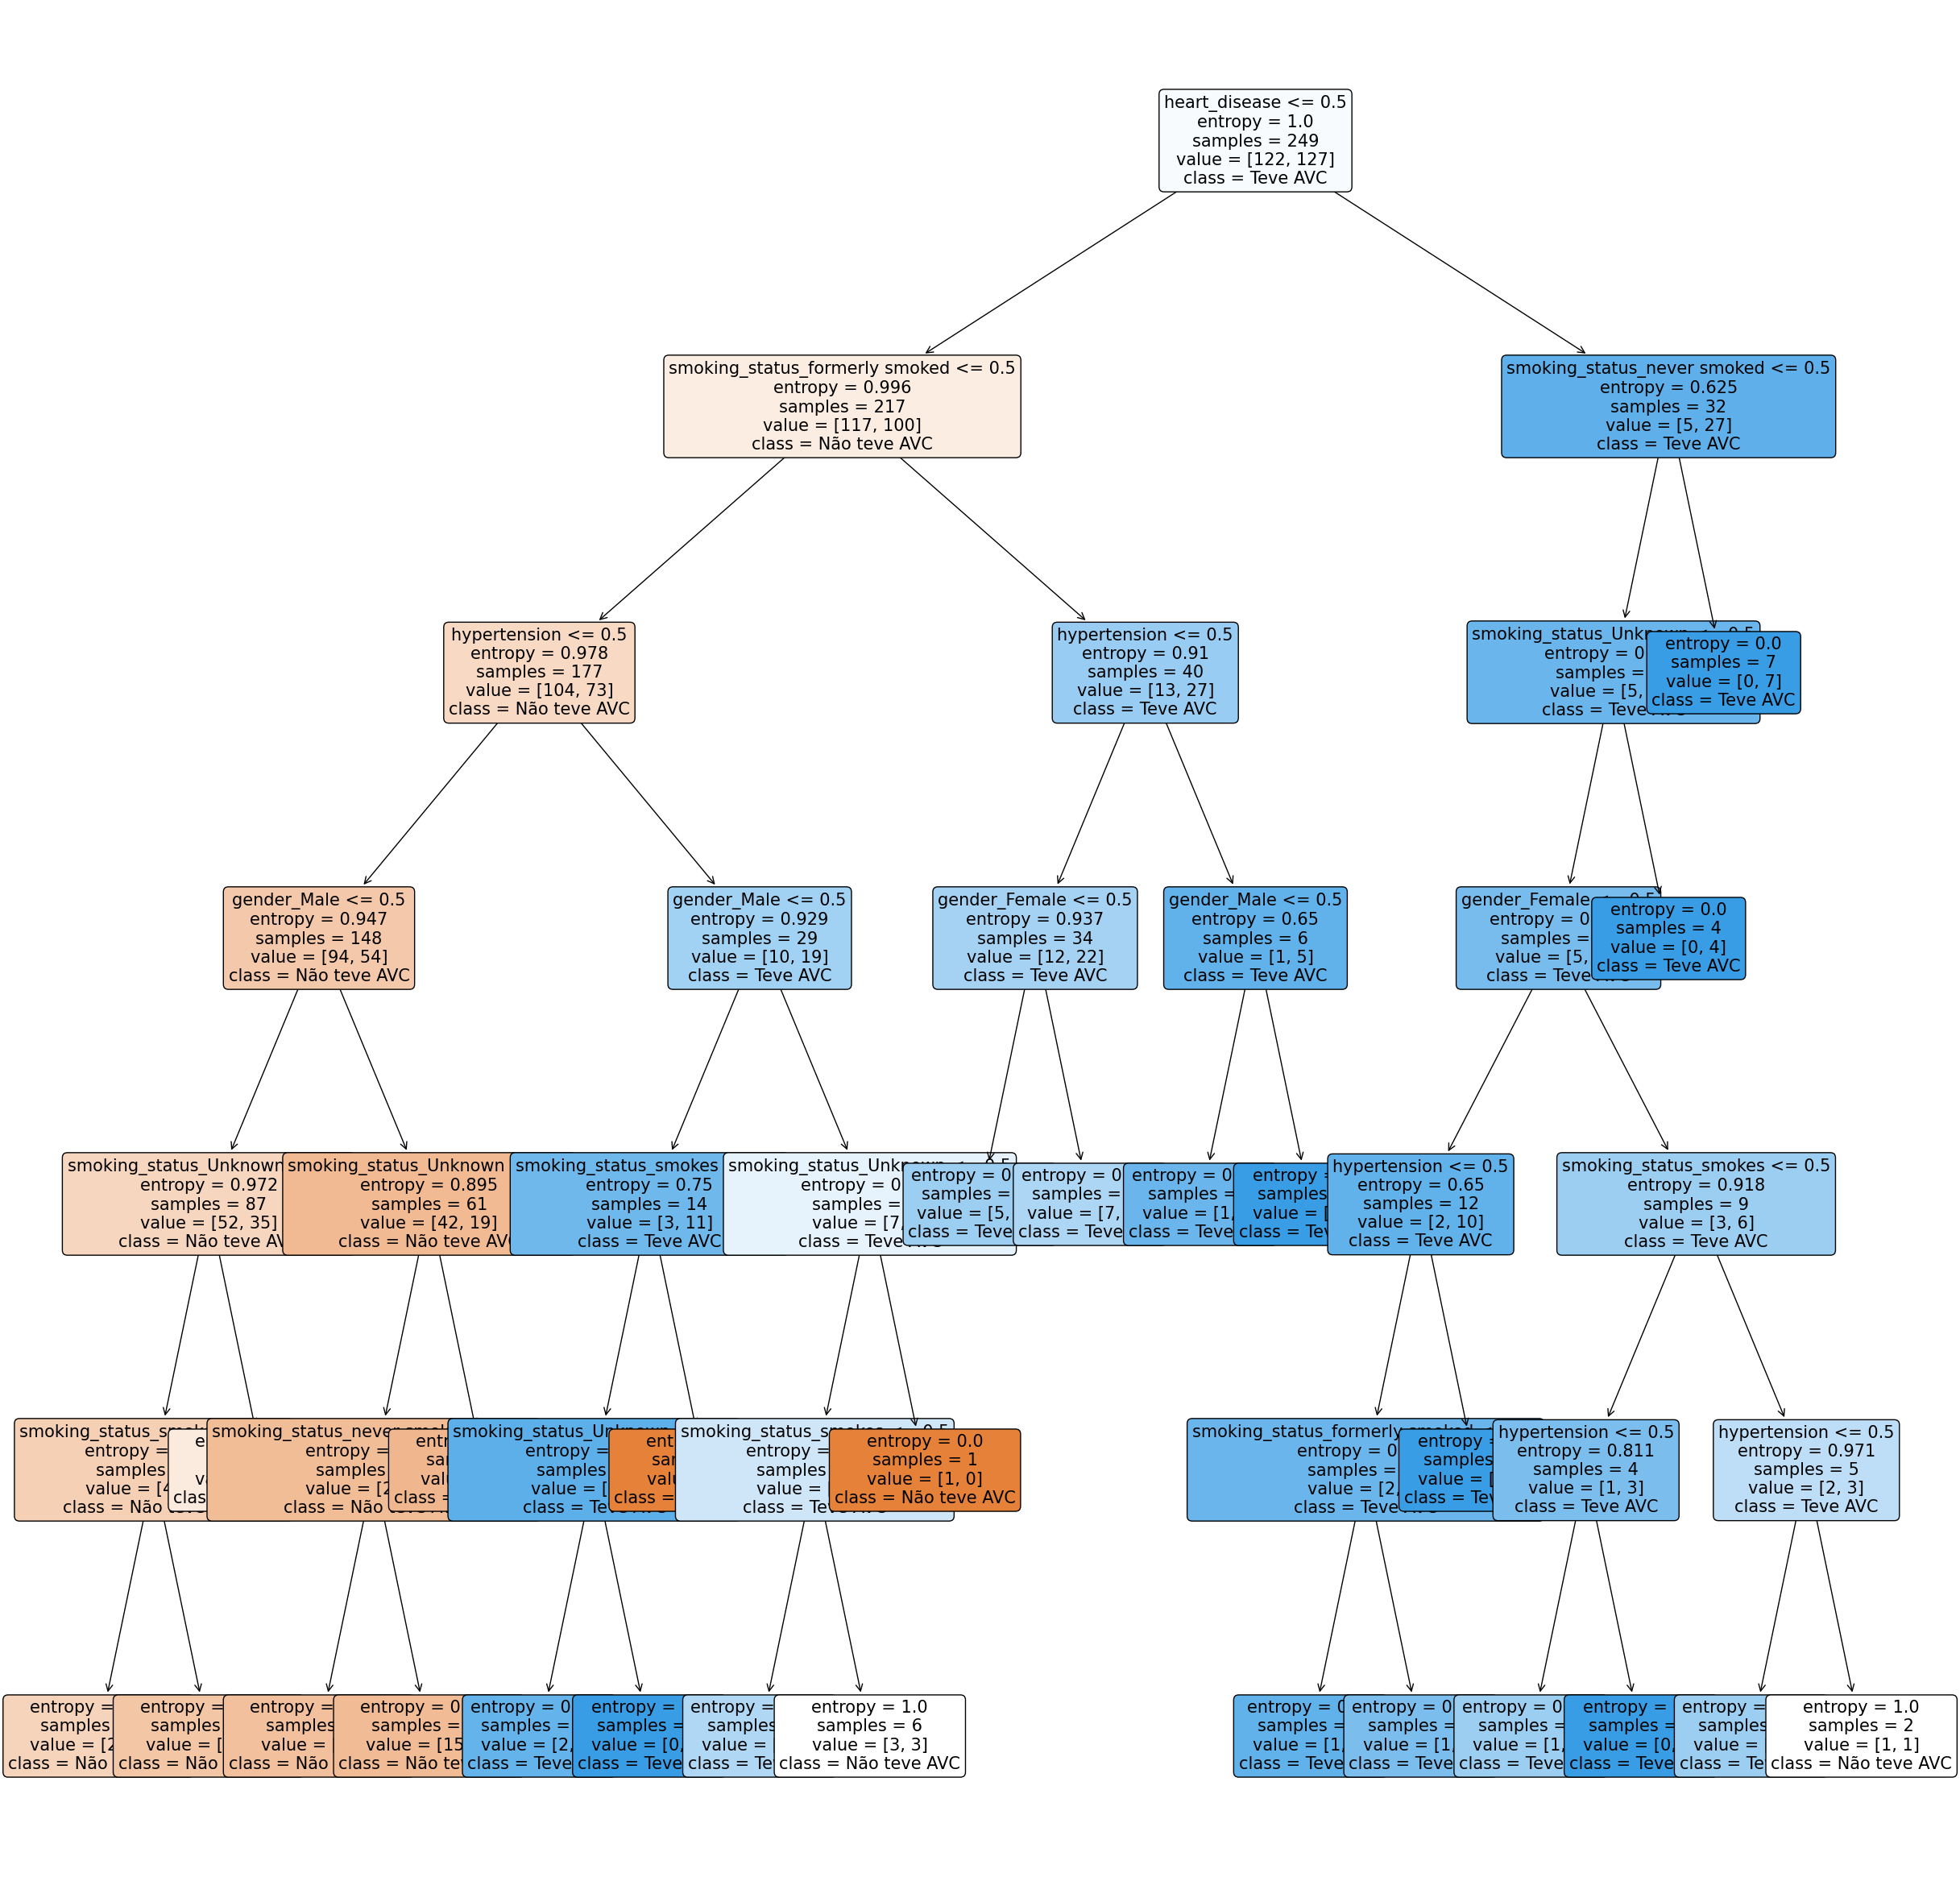

In [148]:
# Plotando a árvore de decisão
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 30))
plot_tree(classificador, filled=True, rounded=True, class_names=['Não teve AVC', 'Teve AVC'], feature_names=X_names,
          fontsize=15, node_ids=False)
plt.show()

In [149]:
# Obtendo as features mais importantes
importances = pd.DataFrame(data=classificador.feature_importances_, index=X_names, columns=['importance']).sort_values(
    by='importance', ascending=False)
importances

importance
heart_disease                     0.331512
hypertension                      0.201303
smoking_status_formerly smoked    0.171399
smoking_status_Unknown            0.086755
smoking_status_smokes             0.072984
gender_Male                       0.070115
smoking_status_never smoked       0.050573
gender_Female                     0.015359

In [150]:
print(f'A acurácia da hipótese nula foi de {acuracia_nula * 100:.2f}%')
print(f'A acurácia do modelo foi de {acuracia * 100:.2f}%')

A acurácia da hipótese nula foi de 50.00%
A acurácia do modelo foi de 60.24%


Nessa análise, obtivemos dados de acurácia semelhantes aos testes anteriores. Isso indica que os dados relacionados à saúde são suficientes para prever se uma pessoa teve ou não um AVC. Ademais, ambos os classificadores mostraram, mesmo que não na mesma ordem, que as variáveis mais importantes para a decisão são as relacionadas à hipertensão, presença de doenças cardíacas e uso de cigarros.

## Hipótese 4

Para finalizar, vamos utilizar apenas as variáveis mais relevantes que foram levantadas por nossos classificadores para realizar as análises.

Nos modelos previamente analisados, é possível verificar que `hypertension`, `smoking_status`, `heart_disease`, `work_type` e `gender` são as features que mais aparecem com uma grande importância absoluta no modelo. Assim, vamos agora treinar novamente os modelos, em uma base de dados balanceada, avaliando a acurácia apenas com essas features, verificando se há mudanças significativas frente à hipótese nula e, por fim, avaliar, academicamente, se realmente existe uma correlação entre elas e a ocorrência ou não de AVCs.

In [151]:
# Obtendo os dados
try:
    df_ = df[['hypertension', 'smoking_status', 'heart_disease', 'work_type', 'gender', 'stroke']]  
except:
    pass

In [152]:
df_.head()

hypertension   smoking_status  heart_disease      work_type  gender  stroke
0             0  formerly smoked              1        Private    Male       1
1             0     never smoked              0  Self-employed  Female       1
2             0     never smoked              1        Private    Male       1
3             0           smokes              0        Private  Female       1
4             1     never smoked              0  Self-employed  Female       1

In [153]:
# Separando a base de dados balanceada
df_stroke = df_[df_.stroke == 1]
df_no_stroke = df_[df_.stroke == 0]
# Obtendo um sample aleatório da base de dados sem AVCs
df_no_stroke = df_no_stroke.sample(n=df_stroke.shape[0], random_state=42)
# Concatenando os dados
df_ = pd.concat([df_stroke, df_no_stroke])

In [154]:
# Separando os dados
X = df_.drop('stroke', axis=1)
y = df_.stroke

In [155]:
# Obtendo variáveis categoricas
object_features = [feature for feature in X.columns if X[feature].dtype == 'O']
int_features = [feature for feature in X.columns if X[feature].dtype == 'int64']
categorical_features = object_features + int_features

In [156]:
# Obtendo variáveis dummy
X = X[categorical_features]

X = pd.get_dummies(X)
X.hypertension = X.hypertension.astype('bool')
X.heart_disease = X.heart_disease.astype('bool')

X_names = X.columns

y = y.replace(0, -1)

X = X.to_numpy()
y = y.to_numpy()

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)
X_train = X_train.astype('float64')
y_train = y_train.astype('float64')
X_test = X_test.astype('float64')
y_test = y_test.astype('float64')

In [158]:
# Inicializando os parâmetros do modelo
a = np.random.randn(X_train.shape[1], 1)
b = 1.0

X_train = X_train.T
y_train = y_train.T

parametros = [a, b, X_train, y_train]
learning_rate = 0.0001
num_iteracoes = 50000

In [159]:
classificador = ClassificadorAlfa(learning_rate, num_iteracoes, parametros)

In [160]:
# Treinando o modelo
a, b = classificador.treinar()
a, b

(array([[ 0.19217576],
        [-0.23583084],
        [-0.54751383],
        [ 0.08143934],
        [-0.26301196],
        [-0.01435333],
        [-0.51352055],
        [-0.34814592],
        [-0.24089284],
        [ 0.08838683],
        [-0.24168594],
        [-0.13087106],
        [-0.06830532]]),
 0.5042925917617612)

In [161]:
# Fazendo previsões
ypred = a.T @ X_test.T + b
ypred

array([[-0.40311098,  0.11817537, -0.06791753, -0.35241939,  0.16903603,
         0.19608181,  0.51002077, -0.13048327,  0.21396803, -0.41498513,
        -0.06791753, -0.35321249,  0.27653377, -0.13048327, -0.13048327,
        -0.41498513, -0.06791753,  0.11817537,  0.1987964 , -0.13048327,
         0.27653377, -0.05865968, -0.13048327, -0.58825024,  0.10647029,
         0.73542345, -0.13048327,  0.39097215, -0.35241939, -0.41577823,
        -0.41577823,  0.13351608, -0.13048327, -0.23773635,  0.21396803,
        -0.06791753, -0.38420033,  0.27653377,  0.79798919, -0.13048327,
        -0.68761284, -0.34054524, -0.36631411,  0.11817537,  0.11817537,
         0.5432477 ,  0.79798919,  0.27653377,  0.60581343,  0.30741685,
        -0.41498513, -0.13048327,  0.27653377, -0.13048327,  0.11817537,
        -0.06791753,  0.18074111,  0.12425823, -0.13048327,  0.18074111,
         0.37291686,  0.11817537, -0.35241939, -0.02186281, -0.21093522,
        -0.05508974,  0.37291686, -0.13048327,  0.0

In [162]:
acuracia = ClassificadorAlfa.acuracia(y_test, ypred)
print(f'A acurácia do modelo foi de {acuracia * 100:.2f}%')

A acurácia do modelo foi de 55.42%


In [163]:
# Selecionando as features mais importantes
features = X_names
importances = pd.DataFrame(data=np.abs(a), index=features, columns=['importance']).sort_values(by='importance', ascending=False)
importances

importance
smoking_status_Unknown            0.547514
work_type_Govt_job                0.513521
work_type_Never_worked            0.348146
smoking_status_never smoked       0.263012
work_type_children                0.241686
work_type_Private                 0.240893
heart_disease                     0.235831
hypertension                      0.192176
gender_Female                     0.130871
work_type_Self-employed           0.088387
smoking_status_formerly smoked    0.081439
gender_Male                       0.068305
smoking_status_smokes             0.014353

In [164]:
# Obtendo a acurácia da hipótese nula
acuracia_nula = y[y == -1].shape[0] / y.shape[0]

print(f'A acurácia da hipótese nula foi de {acuracia_nula * 100:.2f}%')
print(f'A acurácia do modelo foi de {acuracia * 100:.2f}%')

A acurácia da hipótese nula foi de 50.00%
A acurácia do modelo foi de 55.42%


### Utilizando um classificador de árvore de decisão

In [165]:
classificador = DecisionTreeClassifier(criterion='entropy')

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)
X_train = X_train.astype('float64')
y_train = y_train.astype('float64')
X_test = X_test.astype('float64')
y_test = y_test.astype('float64')

In [167]:
classificador.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [168]:
classificador.predict(X_test)

array([ 1., -1.,  1.,  1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1.,  1.,  1., -1., -1., -1., -1., -1.,  1., -1.,
       -1., -1., -1., -1.,  1., -1., -1., -1., -1., -1.,  1.,  1., -1.,
       -1., -1., -1., -1., -1.,  1., -1., -1.,  1., -1.,  1.,  1., -1.,
       -1., -1., -1., -1., -1., -1.,  1., -1., -1.,  1., -1., -1.,  1.,
       -1.,  1., -1., -1., -1., -1., -1., -1., -1.,  1., -1.,  1., -1.,
       -1.,  1., -1.,  1., -1.,  1., -1., -1., -1.,  1., -1., -1., -1.,
       -1., -1., -1., -1., -1.,  1., -1., -1., -1., -1., -1.,  1., -1.,
       -1., -1., -1., -1.,  1.,  1., -1.,  1.,  1., -1., -1., -1., -1.,
        1.,  1.,  1., -1., -1., -1., -1., -1., -1.,  1.,  1., -1.,  1.,
       -1., -1.,  1., -1.,  1., -1.,  1.,  1., -1., -1., -1., -1.,  1.,
        1., -1., -1., -1., -1.,  1., -1., -1., -1.,  1., -1.,  1., -1.,
        1., -1., -1.,  1.,  1., -1.,  1., -1., -1., -1., -1., -1., -1.,
        1., -1.,  1.,  1., -1.,  1., -1., -1., -1., -1., -1., -1

In [169]:
acuracia = classificador.score(X_test, y_test)

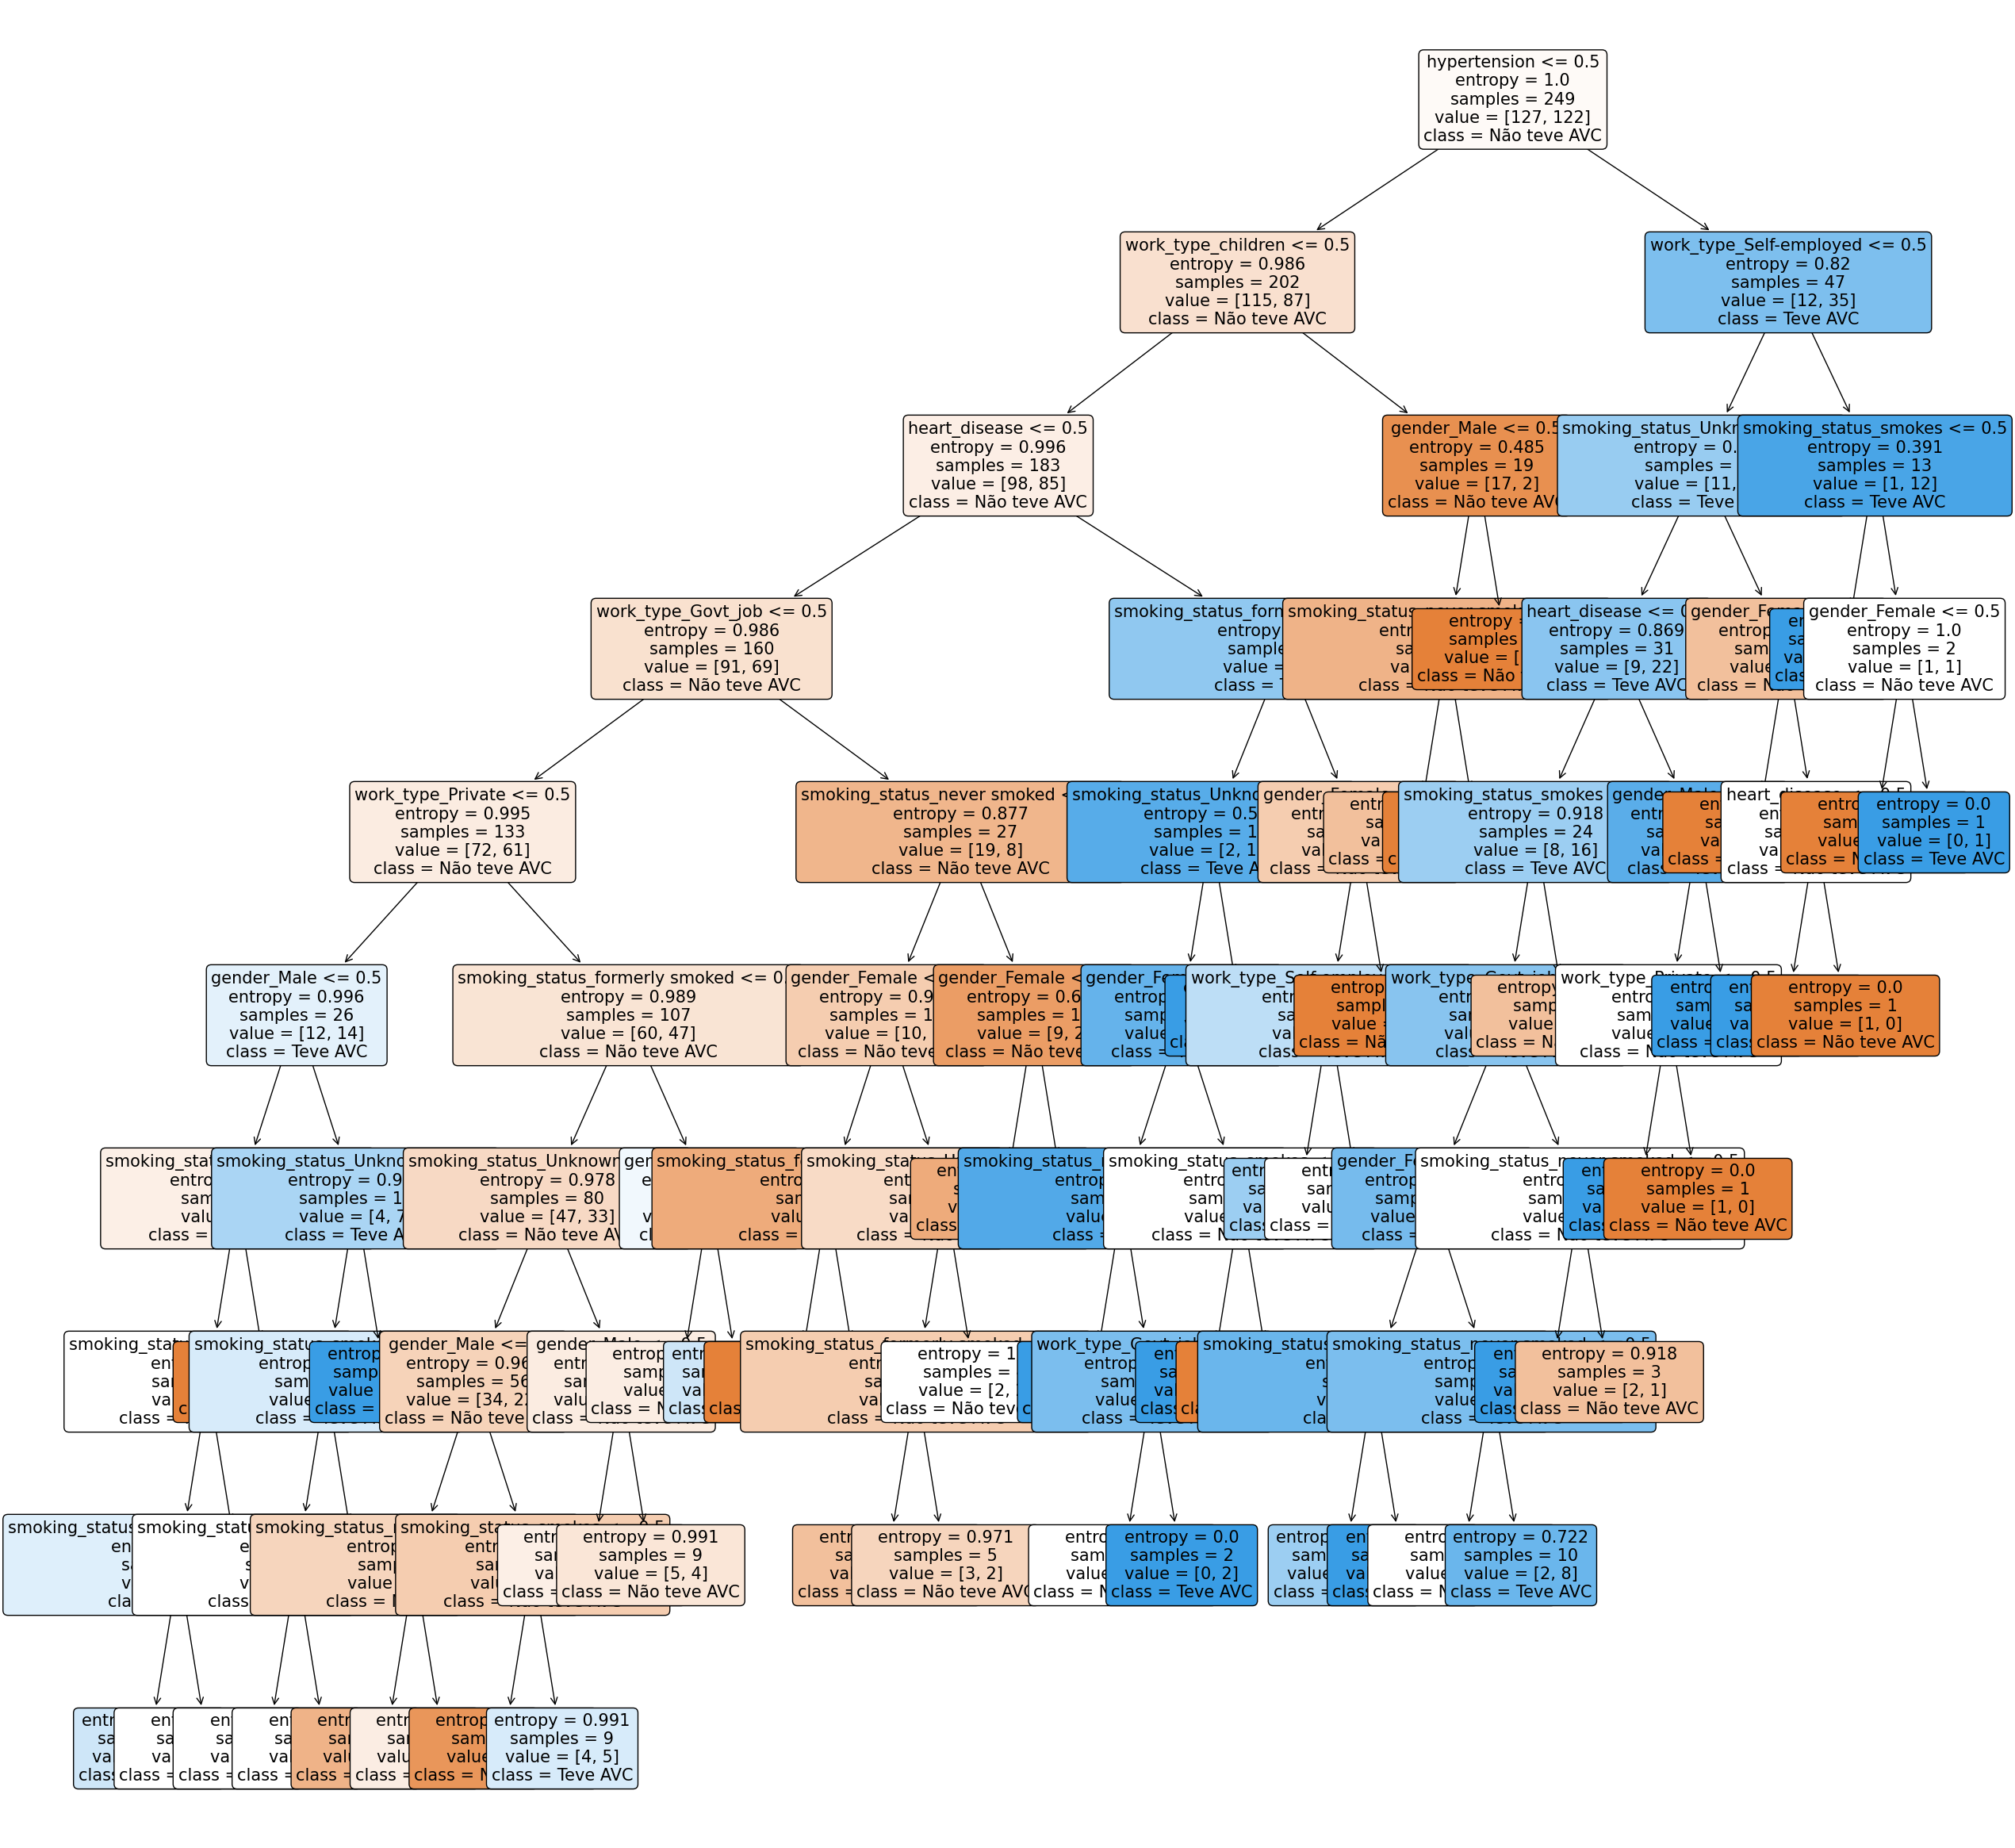

In [170]:
# Plotando a árvore de decisão
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 30))
plot_tree(classificador, filled=True, rounded=True, class_names=['Não teve AVC', 'Teve AVC'], feature_names=X_names,
          fontsize=15, node_ids=False)
plt.show()

In [171]:
# Obtendo as features mais importantes
importances = pd.DataFrame(data=classificador.feature_importances_, index=X_names, columns=['importance']).sort_values(
    by='importance', ascending=False)
importances

importance
hypertension                      0.149758
smoking_status_smokes             0.137886
work_type_children                0.101942
smoking_status_formerly smoked    0.094565
gender_Female                     0.093098
heart_disease                     0.092062
gender_Male                       0.081773
smoking_status_never smoked       0.071024
smoking_status_Unknown            0.057189
work_type_Govt_job                0.050558
work_type_Self-employed           0.035478
work_type_Private                 0.034668
work_type_Never_worked            0.000000

In [172]:
print(f'A acurácia da hipótese nula foi de {acuracia_nula * 100:.2f}%')
print(f'A acurácia do modelo foi de {acuracia * 100:.2f}%')

A acurácia da hipótese nula foi de 50.00%
A acurácia do modelo foi de 57.83%


## Conclusão

Com os classificadores elaborados pelo grupo, foi possível, com as bases de dados balanceadas, obter uma acurácia que foi significativamente superior à hipótese nula. Utilizando o dataset completo, todavia, não é possível chegar à conclusão de que os classificadores elaborados são significativamente melhores que a hipótese nula, não sendo possível descartá-la. 

Após as análises do classificador linear (`ClassificadorAlfa`) e classificador de árvore de decisão (`DecisionTreeClassifier`) elaborados, foi possível obter uma ideia de quais foram as principais features avaliadas por ambos os modelos para chegar à conclusão se um indivíduo possui um AVC ou não, permitindo também identificar alguns fatores de risco. Na hipótese 4, o grupo elaborou uma análise apenas com as features mais recorrentemente importantes nas 3 hipóteses anteriores, obtendo como mais importantes:

- Indivíduo possui problemas com hipertensão?
- Qual o status de fumante do indivíduo?
- Qual o tipo de trabalho do indivíduo?
- Qual o gênero do indivíduo?
- O indivíduo possui problemas cardíacos?

É importante notar que, apesar de se apresentarem como variáveis importantes na elaboração do modelo, não quer dizer que sejam fatores causadores de um AVC. O tipo de trabalho do indivíduo pode estar correlacionado, por exemplo, à quantidade de atividade física do indivíduo, um fator que pode ser considerado importante para a análise.

Segundo o artigo [Stroke Risk Factors, Genetics, and Prevention](https://www.ahajournals.org/doi/10.1161/CIRCRESAHA.116.308398), publicado pela [American Heart Association](https://www.heart.org/) e pela [Circulation Research](https://www.ahajournals.org/journal/res), um estudo internacional realizado em 2010 por O'Donnel et al foi responsável por listar até 10 fatores modificáveis na vida de uma pessoa que explicariam até 90% de todos os casos de AVC analisados. Os fatores incluem o consumo de cigarros, hipertensão, problemas cardíacos e atividade física, além de fatores não modificáveis, como idade, gênero e etnia. Os fatores listados como mais importantes pelos modelos realizados, com exceção do tipo de trabalho, que pode estar relacionado a outras questões como prática de atividade física, estão presentes como fatores de risco na pesquisa. Demais fatores também estão presentes, mas não foi possível analisá-los devido à falta de dados, como dieta. O artigo cita Hipertensão e Diabetes como os dois fatores de maior risco para pacientes, entre os fatores modificáveis. Também determina que o ato de fumar contribui para aproximadamente 15% de todas as mortes por AVC nos Estados Unidos anualmente.

Em suma, é possível afirmar que ambos os classificadores fizeram um bom trabalho determinando fatores de risco para AVCs, mesmo que a acurácia não possa ser considerada significativamente melhor que a hipótese nula em todos os casos.

---

### Referências:

- Boehme, A., Esenwa, C., Elkind, M. Stroke Risk Factors, Genetics, and Prevention. Circulation Research, Feb. 2017. Available at [Circulation Research](https://www.ahajournals.org/doi/full/10.1161/CIRCRESAHA.116.308398)
- O'Donnel, J. et al. Risk factors for ischaemic and intracerebral haemorrhagic stroke in 22 countries (the INTERSTROKE study): a case-control study. The Lancet, Jun. 2010. Available at <a href="https://doi.org/10.1016/S0140-6736(10)60834-3">The Lancet</a>